# Simulating a k-armed bandit problem

In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

In [8]:
class bandit():
    
    def __init__(self, k, copies):
        
        self.k = k
        self.copies = copies 
        
        # initialize all actions of the Q-function to 5
        self.Qn = {'a'+str(action):5 for action in range(self.k)}
        
        # initialize all rewards to given distributions  
        self.Rnplus1 = {'a'+str(action):k+5 for action in range(self.k)} 
        
        # initialize number of times each action is played to zero
        self.action_counter = {'a'+str(action):0 for action in range(self.k)}
        
        
    def pull(self, **pull_args):
        '''
        This function pulls an arm based on the type of pulling scheme followed. E.g 
        Epsilon_greedy, upper confidence bound, etc

        Parameters:
        -----------
        **pull_args : keyword arguments
            This dictionary contains the pulling scheme used and the associated hyperparameters
            used for that scheme. E.g for epsilon_greedy, **pull_args would contain 
            pull_name='epsilon_greedy' and epsilon=<float> 
            
        Return:
        -------
        action_chosen : <dictionary>
            The action which the bandit has chosen based on the pull_name
        '''
  
        if pull_args['pull_rule']=='epsilon_greedy':
            action_chosen = self.epsilon_greedy_action_chooser(pull_args['epsilon'])
        
        if pull_args['pull_rule']=='ucb':
            action_chosen = self.ucb_action_chooser(pull_args['c'])
        
        return  action_chosen
    
    
    def epsilon_greedy_action_chooser(self, epsilon):
        '''
        This function makes use of the epsilon greedy approach to choose an action 
        at a particular time-step. 

        Parameters:
        -----------
        epsilon : <float>
                probability of selecting random action
        
        Return:
        -------
        action_chosen : <dictionary>
            The action which the bandit has chosen based on the epsilon-greedy approach
        '''
        best_action = max(self.Qn, key=self.Qn.get)
        if (np.random.random() > epsilon):
            action_chosen = best_action 
        else:
            actions = [action for action,value in self.Qn.items() if action!=best_action] 
            action_chosen = random.choice(actions)
        return action_chosen

    
    def ucb_action_chooser(self, c):
        '''
        This function makes use of the upper confidence bound to choose an action 
        at a particular time-step. 
        
        Parameters:
        -----------
        c : <float>
            probability of selecting random action

        Return:
        -------
        action_chosen : <dictionary>
            The action which the bandit has chosen based on the upper confidence bound approach
        ''' 
        action_value = {}
        for action_number, Q_action in self.Qn.items():
            if self.action_counter[action_number]!=0:
                action_value[action_number] = Q_action+c*np.sqrt(np.log(self.t)/self.action_counter[action_number])
            else:
                return action_number   # return action as it has not been played out even once
    
        best_action = max(action_value, key=action_value.get)
        return best_action
    
    
    def update_average_reward(self, number_of_time_steps, **pull_args):
        '''
        This function chooses the best action for particular time step and updates the average reward of the
        action chosen accordingly.
        
        Parameters:
        -----------
        number_of_time_step: <int>
            The number of iterations the algorithm has to run for.
        
        **pull_args : keyword arguments
            This dictionary contains the pulling scheme used and the associated hyperparameters
            used for that scheme. E.g for epsilon_greedy, **pull_args would contain 
            pull_name='epsilon_greedy' and epsilon=<float> 
            
        Return:
        -------
        average_rewards: <list>
            Returns a list of containing the average reward obtained at each iteration
        '''
        self.number_of_time_steps = number_of_time_steps
        average_rewards = list()
        for current_time_step in range(number_of_time_steps):
            self.t = current_time_step
            action_chosen = self.pull(**pull_args)
            self.action_counter[action_chosen]+=1
            
            #incremental update formula to find the average reward for the current time step        
            self.Qn[action_chosen] = self.Qn[action_chosen] + 1/(current_time_step+1)*(np.random.normal(loc=self.Rnplus1[action_chosen]) - self.Qn[action_chosen])
        
            average_rewards.append(self.Qn[action_chosen])
        return average_rewards
    
    def plot_average_reward(self, average_reward):
        plt.title('Average Reward for {} iteration of K-armed bandit problem'.format(self.number_of_time_steps))
        plt.xlabel('Number of time steps')
        plt.ylabel('Average Reward')
        plt.plot(average_reward)
        plt.show()

In [15]:
bandit_1 = bandit(15, 100)
average_rewards = bandit_1.update_average_reward(number_of_time_steps=5000, pull_rule='ucb', c=0.5)

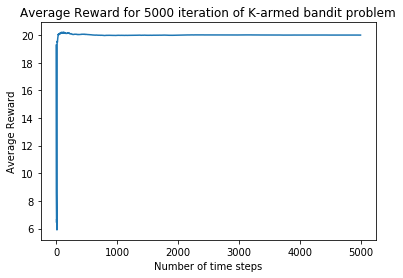

In [16]:
bandit_1.plot_average_reward(average_rewards)

In [17]:
bandit_1.Qn

{'a0': 19.999666431902785,
 'a1': 13.198305037769455,
 'a2': 10.585440215949752,
 'a3': 8.601590340766604,
 'a4': 7.813691822396709,
 'a5': 7.417301938249546,
 'a6': 7.042539720513682,
 'a7': 6.430194642823702,
 'a8': 6.685766692526884,
 'a9': 6.6129094632351295,
 'a10': 6.282269177082645,
 'a11': 6.3068648704449295,
 'a12': 6.233028384637413,
 'a13': 5.900741871287959,
 'a14': 6.013652950470876}